# Days 1 to 5

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
import datetime

In [6]:
import ast

#### importing all files, making it a single dataframe

In [7]:
emprestimos_url = ['https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20101.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20102.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20112.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20121.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20131.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20132.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20141.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20142.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20151.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20152.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20161.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20161.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20171.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20172.csv',
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20181.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20182.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20191.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20192.csv', 
'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20201.csv']   

csv_list = []

for url in emprestimos_url:
    csv_list.append(pd.read_csv(url))

In [8]:
exemplares = pd.read_parquet('C:\\Users\\luca_\\Desktop\\Py Training\\Datasets\\dados_exemplares.parquet')

In [9]:
df_list = []

In [10]:
for df in csv_list:
    df_list.append(df.merge(exemplares,how='left',on='codigo_barras'))

In [11]:
df_completo = pd.concat([df_list[0],df_list[1],df_list[2],df_list[3],df_list[4],df_list[5],df_list[6],df_list[7],df_list[8],df_list[9],df_list[10],df_list[11],df_list[12],df_list[13],df_list[14],df_list[15],df_list[16],df_list[17],df_list[18],df_list[19],df_list[20]],ignore_index=True)

In [12]:
df_completo.drop_duplicates(inplace=True)
df_completo.drop('registro_sistema', axis=1, inplace=True)
df_completo = df_completo.astype({"matricula_ou_siape": str})
df_completo['matricula_ou_siape'] = df_completo['matricula_ou_siape'].str.rstrip('.0')

#### adding a CDU column and converting 'data_emprestimo' column to datetime format

In [13]:
conditions = [
    (df_completo['localizacao'] < 100),
    (df_completo['localizacao'] >= 100) & (df_completo['localizacao'] < 200),
    (df_completo['localizacao'] >= 200) & (df_completo['localizacao'] < 300),
    (df_completo['localizacao'] >= 300) & (df_completo['localizacao'] < 400),
    (df_completo['localizacao'] >= 400) & (df_completo['localizacao'] < 500),
    (df_completo['localizacao'] >= 500) & (df_completo['localizacao'] < 600),
    (df_completo['localizacao'] >= 600) & (df_completo['localizacao'] < 700),
    (df_completo['localizacao'] >= 700) & (df_completo['localizacao'] < 800),
    (df_completo['localizacao'] >= 800) & (df_completo['localizacao'] < 900),
    (df_completo['localizacao'] >= 900)
]

values = ['Generalidades. Ciência e conhecimento', 'Filosofia e psicologia', 'Religião', 'Ciências sociais', 'Classe vaga. Provisoriamente não ocupada',
      'Matemática e ciências naturais','Ciências aplicadas','Belas artes','Linguagem. Língua. Linguística.','Geografia. Biografia. História.']

In [14]:
df_completo['CDU'] = np.select(conditions, values)

In [15]:
df_completo['data_emprestimo'] = pd.to_datetime(df_completo['data_emprestimo'], format='%Y/%m/%d %H:%M:%S')

In [16]:
df_completo_copy = df_completo.copy()

#### helper funcions so we can group by year, month and hour easier

In [19]:
def year(date):
    return date.year

In [20]:
def month(date):
    return date.month

In [21]:
def hour(date):
    return date.hour

In [22]:
df_completo['ano_emprestimo'] = df_completo['data_emprestimo'].apply(year)

In [23]:
df_completo['mes_emprestimo'] = df_completo['data_emprestimo'].apply(month)

In [24]:
df_completo['hora_emprestimo'] = df_completo['data_emprestimo'].apply(hour)

#### functions to plot by certain period of time and create tables

In [20]:
def plot_yearly(df):
    plt.figure(figsize=(5,5))
    plt.plot(df_completo.groupby('ano_emprestimo').id_exemplar.nunique())

In [21]:
def plot_monthly(year, df):
    plt.figure(figsize=(5,5))
    df[df['ano_emprestimo'] == year].groupby('mes_emprestimo').id_exemplar.nunique().plot(title=f'Empréstimos ao longo do ano de {year}')

In [22]:
def plot_hour(day, month,year, df):
    plt.figure(figsize=(10,5))
    df[df['data_emprestimo'].dt.date == datetime.date(year,month,day)].groupby('hora_emprestimo').id_exemplar.nunique().plot(kind='bar', 
                                                                                                                             title= f'Empréstimos do dia {day}/{month}/{year}')

In [23]:
def make_pretty(styler):
    styler.background_gradient(axis=None, vmin=1000, vmax=20000, cmap="Blues")
    styler.hide_index()
    return styler

In [24]:
def table_monthly(year, df):
    meses = ['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']
    a = pd.DataFrame(df[df['ano_emprestimo'] == year].groupby('mes_emprestimo').id_exemplar.nunique())
    a['Empréstimos']=a['id_exemplar']
    a['Meses']=meses
    a.drop(['id_exemplar'],axis=1,inplace=True)
    a = a[['Meses','Empréstimos']]
    
    a = a.style.pipe(make_pretty)
    
    return a

In [25]:
def stats(series):
    
    a = pd.DataFrame(series.value_counts())
    a.reset_index(inplace=True)
    
    a[a.columns[1]] = (a[a.columns[1]]/sum(a[a.columns[1]]))*100
    a.loc[:, a.columns[1]] = a[a.columns[1]].map('{:.2f}'.format)
    
    name = a.columns[1].split('_')
    name = ' '.join(name)
    
    a.rename(columns={'index': name, a.columns[1]: '% do total'}, inplace=True)
    a = a.style.hide_index() 
        
    return a

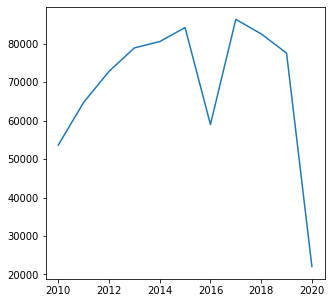

In [119]:
plot_yearly(df_completo)

In [219]:
table_monthly(2019, df_completo)

Meses,Empréstimos
jan,4546
fev,19674
mar,18318
abr,16698
mai,15254
jun,10258
jul,13242
ago,18119
set,15354
out,13708


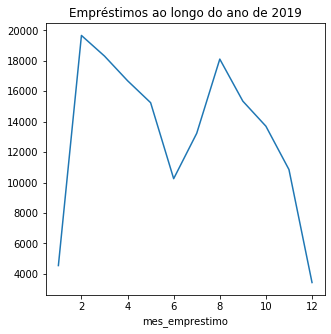

In [121]:
plot_monthly(2019, df_completo)

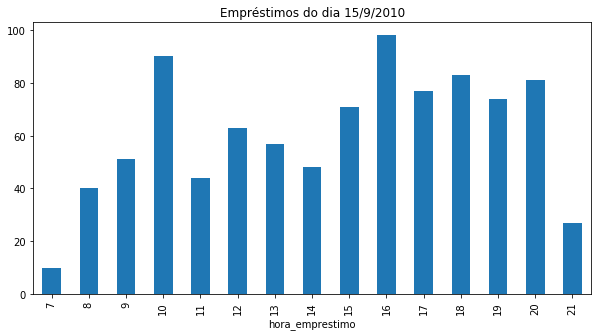

In [116]:
plot_hour(15,9,2010, df_completo)

In [171]:
stats(df_completo['tipo_vinculo_usuario'])

tipo vinculo usuario,% do total
ALUNO DE GRADUAÇÃO,78.46
ALUNO DE PÓS-GRADUAÇÃO,14.08
DOCENTE,3.45
SERVIDOR TÉCNICO-ADMINISTRATIVO,1.51
ALUNO MÉDIO/TÉCNICO,1.31
DOCENTE EXTERNO,1.07
USUÁRIO EXTERNO,0.12
OUTROS,0.00


In [172]:
stats(df_completo['colecao'])

colecao,% do total
Acervo Circulante,99.05
Multimeios,0.39
Monografias,0.20
Dissertações,0.12
Obras de Referência,0.09
Publicações de Autores do RN,0.04
Publicações da UFRN,0.04
Teses,0.04
Folhetos,0.01
Necessidades Educacionais Específicas,0.01


In [162]:
stats(df_completo['biblioteca'])

biblioteca,% do total
Biblioteca Central Zila Mamede,68.91
Biblioteca Setorial do Centro Ciências da Saúde - CCS,5.76
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,3.73
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,3.20
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,2.97
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,2.24
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",1.99
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,1.45
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,1.42
Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ,1.29


In [163]:
stats(df_completo['CDU'])

CDU,% do total
Ciências aplicadas,63.60
Ciências sociais,15.99
0,8.57
Matemática e ciências naturais,3.00
Generalidades. Ciência e conhecimento,2.61
Religião,2.61
Filosofia e psicologia,2.53
Geografia. Biografia. História.,0.37
Belas artes,0.37
Linguagem. Língua. Linguística.,0.35


In [25]:
df_filtered = df_completo[['tipo_vinculo_usuario','id_exemplar','colecao','ano_emprestimo','mes_emprestimo']].copy()

df_filtered_grad = df_filtered[df_filtered['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO']
df_filtered_posgrad = df_filtered[df_filtered['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO']

popular_grad = df_filtered_grad['colecao'].value_counts().index.tolist()[0]
popular_posgrad = df_filtered_posgrad['colecao'].value_counts().index.tolist()[0]

df_filtered_grad = df_filtered_grad[df_filtered_grad['colecao'] == popular_grad]
df_filtered_posgrad = df_filtered_posgrad[df_filtered_posgrad['colecao'] == popular_posgrad]

In [27]:
def plot_box_monthly(year, df1,df2):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    a = df1[df1['ano_emprestimo'] == year].groupby('mes_emprestimo').id_exemplar.nunique()
    plt.boxplot(a)
    plt.title('Empréstimos mensais na \ngraduação no ano de ' + str(year))
    
    plt.subplot(1,2,2)
    b = df2[df2['ano_emprestimo'] == year].groupby('mes_emprestimo').id_exemplar.nunique()
    plt.boxplot(b)
    plt.title('Empréstimos mensais na \nPós no ano de ' + str(year))

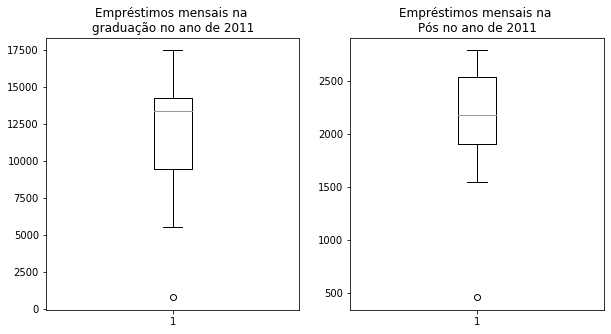

In [87]:
plot_box_monthly(2011, df_filtered_grad, df_filtered_posgrad)

# day 6 and 7

#### extracting and transforming into DataFrames

In [1]:
curso_previsao_2022 = {
'administracao' : 1905,
'arquitetura_e_urbanismo': 1896,
'artes_cenicas': 1920,
'bioinformatica': 2302,
'bioquimica' :2090,
'ciencia_e_engenharia_de_materiais' :2010,
'ciencia_tecnologia_e_inovacao': 1960,
'ciencias_da_saude': 1730,
'ciencias_odontologicas' :2405,
'design': 1900,
'engenharia_civil': 1920,
'engenharia_software' :1890,
'filosofia' :1903,
'gestao_da_informacao_e_do_conhecimento' :1855,
}

In [26]:
df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?_hsenc=p2ANqtz--l2bvjcUWKmx1znimEZ0Us9DnUijWJIogN_nrNj4HkoMUDPsarkHKX1SigYPAUw0yk_hLI55M49Eh0Omha5Z18ObAOQg&_hsmi=270881120')
df_excel = pd.read_excel("C:\\Users\luca_\\Desktop\\Py Training\\7 days of code - ALURA\\matricula_alunos.xlsx")

json_list_grad = ast.literal_eval(df_json['registros'][0])
json_list_posgrad = ast.literal_eval(df_json['registros'][1])

In [68]:
list(json_list_grad[0].values())

['2009029003.0', 'ALUNO DE GRADUAÇÃO', 'FILOSOFIA']

In [ ]:
df_excel_copy = df_excel.copy()
df_excel_copy.drop(0, axis=0, inplace=True)
for line in json_list_grad:
    df_excel_copy.loc[len(df_excel_copy)+1] = list(line.values())

In [27]:
df_excel_posgrad = df_excel.copy()
df_excel_posgrad.drop(0, axis=0, inplace=True)
for line in json_list_posgrad:
    df_excel_posgrad.loc[len(df_excel_posgrad)+1] = list(line.values())

#### organazing DataFrame and Copying to avoid bugs in the original if needed, also matching the matricula_ou_siape column type with the complete dataframe

In [112]:
df_excel_copy = df_excel_copy.rename(columns={'Matricula de alunos até 2010': 'matricula_ou_siape', 'Unnamed: 1': 'tipo_vinculo_usuario', 'Unnamed: 2':'curso'})
df_excel_copy = df_excel_copy.astype({"matricula_ou_siape": str})
df_excel_copy['matricula_ou_siape'] = df_excel_copy['matricula_ou_siape'].str.rstrip('.0')

In [28]:
df_excel_posgrad = df_excel_posgrad.rename(columns={'Matricula de alunos até 2010': 'matricula_ou_siape', 'Unnamed: 1': 'tipo_vinculo_usuario', 'Unnamed: 2':'curso'})
df_excel_posgrad = df_excel_posgrad.astype({"matricula_ou_siape": str})
df_excel_posgrad['matricula_ou_siape'] = df_excel_posgrad['matricula_ou_siape'].str.rstrip('.0')

In [118]:
df_excel_copy.columns[df_excel_copy.isnull().any()].tolist()

[]

#### getting only the data from 'ALUNOS DE GRADUAÇÃO' and from 2015 onwards and after, getting only the data from 'ALUNOS DE PÓs GRADUAÇÃO' from 2017 onwards merging with the df containing the respective courses

In [124]:
post_2015_grad = pd.DataFrame(df_completo[df_completo['ano_emprestimo'] >=2015])
post_2015_grad = pd.DataFrame(post_2015_grad[post_2015_grad['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'])
post_2015_grad.drop(['id_emprestimo','codigo_barras','data_renovacao','data_emprestimo','data_devolucao','status_material','mes_emprestimo','hora_emprestimo'], axis=1, inplace=True)
post_2015_grad_courses = pd.merge(post_2015_grad, df_excel_copy, on=['matricula_ou_siape'])

In [32]:
post_2017_posgrad = pd.DataFrame(df_completo[df_completo['ano_emprestimo'] >=2017])
post_2017_posgrad = pd.DataFrame(post_2017_posgrad[post_2017_posgrad['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'])
post_2017_posgrad.drop(['id_emprestimo','codigo_barras','data_renovacao','data_emprestimo','data_devolucao','status_material','mes_emprestimo','hora_emprestimo'], axis=1, inplace=True)
post_2017_posgrad_courses = pd.merge(post_2017_posgrad, df_excel_posgrad, on=['matricula_ou_siape'])

#### grouping by year and course and displaying it on a table

In [158]:
grouped = post_2015_grad_courses.groupby(['ano_emprestimo','curso']).size().reset_index(name='Contagem')
grouped = grouped[(grouped['curso'] == 'BIBLIOTECONOMIA') | 
                  (grouped['curso'] == 'CIÊNCIAS SOCIAIS') | 
                  (grouped['curso'] == 'COMUNICAÇÃO SOCIAL') | 
                  (grouped['curso'] == 'DIREITO') |
                  (grouped['curso'] == 'FILOSOFIA') |
                  (grouped['curso'] == 'PEDAGOGIA') ]

grouped_pivot = pd.pivot_table(grouped, index='curso', columns='ano_emprestimo')
grouped_pivot.loc[:,'Total'] = grouped_pivot.sum(axis=1)
grouped_pivot.loc['Total',:] = grouped_pivot.sum(axis=0)

In [80]:
grouped_pos = post_2017_posgrad_courses.groupby(['ano_emprestimo','curso']).size().reset_index(name='Contagem')
grouped_pos_pivot = pd.pivot_table(grouped_pos, index='curso', columns='ano_emprestimo')

In [178]:
grouped_pivot

Contagem                                              \
ano_emprestimo         2015     2016     2017     2018     2019    2020   
curso                                                                     
BIBLIOTECONOMIA      7994.0   3877.0   7661.0   6661.0   6264.0   945.0   
CIÊNCIAS SOCIAIS     7785.0   3813.0   7300.0   6478.0   6061.0   860.0   
COMUNICAÇÃO SOCIAL   7548.0   4635.0   8846.0   7420.0   6240.0   838.0   
DIREITO              7881.0   4087.0   8176.0   7265.0   6123.0   937.0   
FILOSOFIA            7362.0   4109.0   7798.0   6630.0   5876.0   865.0   
PEDAGOGIA            7579.0   4024.0   7912.0   6832.0   6186.0   916.0   
Total               46149.0  24545.0  47693.0  41286.0  36750.0  5361.0   

                       Total  
ano_emprestimo                
curso                         
BIBLIOTECONOMIA      33402.0  
CIÊNCIAS SOCIAIS     32297.0  
COMUNICAÇÃO SOCIAL   35527.0  
DIREITO              34469.0  
FILOSOFIA            32640.0  
PEDAGOGIA            33449.0  
Total               201784.0

# Day 7 specifics

In [107]:
df_curso_previsao_2022 = pd.DataFrame(curso_previsao_2022.items())

In [197]:
grouped_pos_pivot_frame=grouped_pos_pivot['Contagem'].copy()

In [198]:
grouped_pos_pivot_frame.loc[:,'2022'] = df_curso_previsao_2022[1][:].values
grouped_pos_pivot_frame.drop(2020,axis=1,inplace=True)

In [200]:
list17_18 =((grouped_pos_pivot_frame.loc[:,2018] - grouped_pos_pivot_frame.loc[:,2017])/grouped_pos_pivot_frame.loc[:,2017])*100
list17_18 = ['{:.2f}%'.format(i) for i in list17_18]

list18_19 =((grouped_pos_pivot_frame.loc[:,2019] - grouped_pos_pivot_frame.loc[:,2018])/grouped_pos_pivot_frame.loc[:,2018])*100
list18_19 = ['{:.2f}%'.format(i) for i in list18_19]

list19_22 =((grouped_pos_pivot_frame.loc[:,'2022'] - grouped_pos_pivot_frame.loc[:,2019])/grouped_pos_pivot_frame.loc[:,2019])*100
list19_22 = ['{:.2f}%'.format(i) for i in list19_22]

In [201]:
grouped_pos_pivot_frame.loc[:,2017] = list17_18
grouped_pos_pivot_frame.loc[:,2018] = list18_19
grouped_pos_pivot_frame.loc[:,2019] = list19_22
grouped_pos_pivot_frame.drop('2022',axis=1,inplace=True)

In [202]:
grouped_pos_pivot_frame.rename(columns={2017: '2017-2018',2018: '2018-2019',2019: '2019-2022'},inplace=True)

In [220]:
grouped_pos_pivot_frame.index = [curso.capitalize() for curso in grouped_pos_pivot_frame.index]

In [242]:
grouped_pos_pivot_frame.columns.name = 'Mudança % entre'

In [189]:
def get_value(percentage):
    a = percentage[:-1]
    return float(a)

In [244]:
html_final = grouped_pos_pivot_frame.style.applymap(lambda x: 'color: green' if get_value(x)>0 else 'color: red')

In [245]:
html_final

Mudança % entre,2017-2018,2018-2019,2019-2022
,,,
Administração,-10.85%,-26.31%,8.12%
Arquitetura e urbanismo,-13.37%,-6.42%,1.55%
Artes cênicas,-2.26%,-12.55%,1.32%
Bioinformática,-13.93%,-5.08%,21.86%
Bioquímica,-15.47%,5.14%,-1.69%
Ciência e engenharia de materiais,-8.62%,-6.12%,-4.29%
"Ciência, tecnologia e inovação",-3.16%,-14.28%,-6.71%
Ciências da saúde,-19.33%,-9.29%,-7.68%
Ciências odontológicas,6.57%,-16.20%,7.90%


In [258]:
print(html_final.render())

<style  type="text/css" >
    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow0_col0 {
            color:  red;
            color:  red;
            color:  red;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow0_col1 {
            color:  red;
            color:  red;
            color:  red;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow0_col2 {
            color:  green;
            color:  green;
            color:  green;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow1_col0 {
            color:  red;
            color:  red;
            color:  red;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow1_col1 {
            color:  red;
            color:  red;
            color:  red;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow1_col2 {
            color:  green;
            color:  green;
            color:  green;
        }    #T_4cec89b8_52b5_11ef_9be1_988389e8eb8drow2_col0 {
            color:  red;
            color:  red;
            color:  red

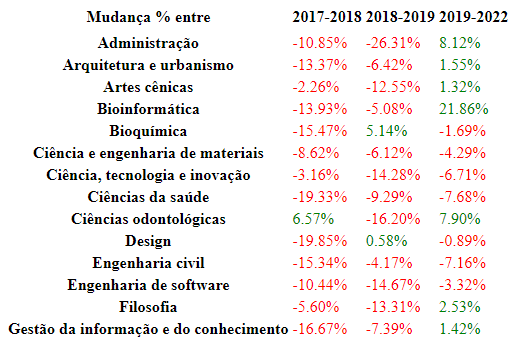